In [1]:
# Importação das bibliotecas que utilizaremos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import cufflinks as cf





In [2]:
import os
for dirname, _, filenames in os.walk('C:/Users/Raul/Inteligencia Artificial\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Raul/Inteligencia Artificial\data\WorldCupMatches.csv
C:/Users/Raul/Inteligencia Artificial\data\WorldCupPlayers.csv
C:/Users/Raul/Inteligencia Artificial\data\WorldCups.csv


In [3]:
# Leitura dos dados em arquivo CSV

players = pd.read_csv("C:/Users/Raul/Inteligencia Artificial\data\WorldCupPlayers.csv", encoding='utf-8')
matches = pd.read_csv("C:/Users/Raul/Inteligencia Artificial\data\WorldCupMatches.csv", encoding='utf-8')
world_cup = pd.read_csv("C:/Users/Raul/Inteligencia Artificial\data\WorldCups.csv", encoding='utf-8')

In [4]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [5]:
matches.head()


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [6]:
world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [7]:
##Limpeza dos dados 
#Removendo coluna Year que existem valores ausentes
matches.dropna(subset=['Year'], inplace=True)

In [8]:
##Criando uma coluna para exibir o total de gols em uma determinada partida
matches['TotalGols'] = matches['Home Team Goals'] + matches['Away Team Goals']

In [9]:
## Aqui podemos verificar o nome da equipe da casa e a quantidade do jogos que teve no país
matches['Home Team Name'].value_counts()

Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: Home Team Name, Length: 78, dtype: int64

In [10]:
## Corrigindo países com string incorretas
#Pegando todas as linhas que tem caractere incorreto e definimos uma nova tabela com os nomes:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()

#Criando objeto de lista (wrong)
wrong = list(names.index)

#Criando objeto de lista splitando apenas caracteres corretos
correct = [name.split('>')[1] for name in wrong]
correct 

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [11]:
## Corrigindo caracteres especiais ex:ã

old_name = ['Germany FR', 'Maracanã - Estádio Jornalista Mário Filho', 'Estadio do Maracana']
new_name =['Germany', 'Maracan Stadium', 'Maracan Stadium']

wrong = wrong + old_name
correct = correct + new_name


In [12]:
correct 

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina',
 'Germany',
 'Maracan Stadium',
 'Maracan Stadium']

In [13]:
wrong 

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina',
 'Germany FR',
 'Maracanã - Estádio Jornalista Mário Filho',
 'Estadio do Maracana']

In [14]:
# Substituindo na lista, dados, errados por corretos

for index, wr in enumerate(wrong):
    world_cup = world_cup.replace(wrong[index],  correct[index])
    
for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index],  correct[index])
    
for index, wr in enumerate(wrong):
    players = players.replace(wrong[index],  correct[index])

In [15]:
# Testando e vendo que realmente o que foi feito funcionou e os dados foram limpos 

names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: Home Team Name, dtype: int64)

In [16]:
# Após limpeza, tratando os dados com valor NAN's

players = players.replace([float('NaN')],'-')
matches = matches.replace([float('NaN')],'-')
world_cup = world_cup.replace([float('NaN')],'-')

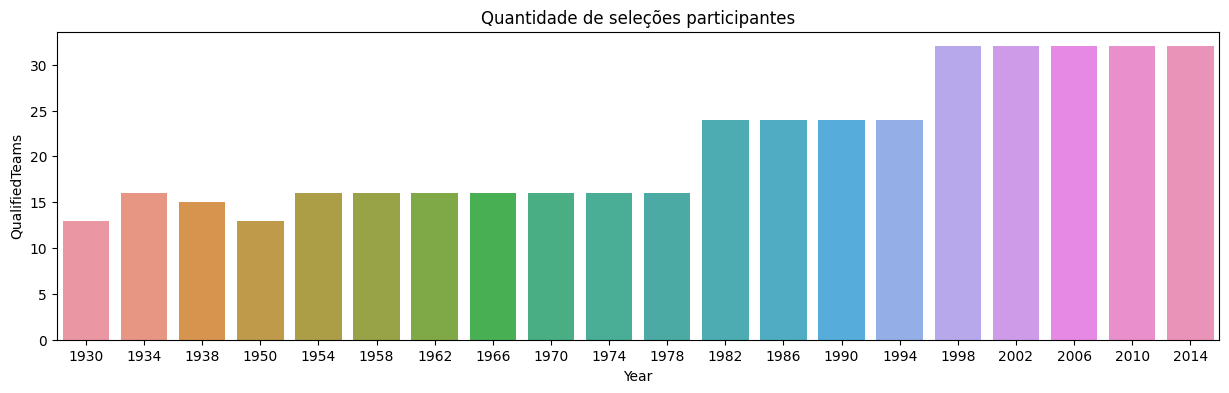

In [17]:
# Seleções participantes

plt.figure(figsize=(15,4))
sns.barplot(x='Year',y='QualifiedTeams', data=world_cup)
plt.title("Quantidade de seleções participantes",color='black')
plt.show()

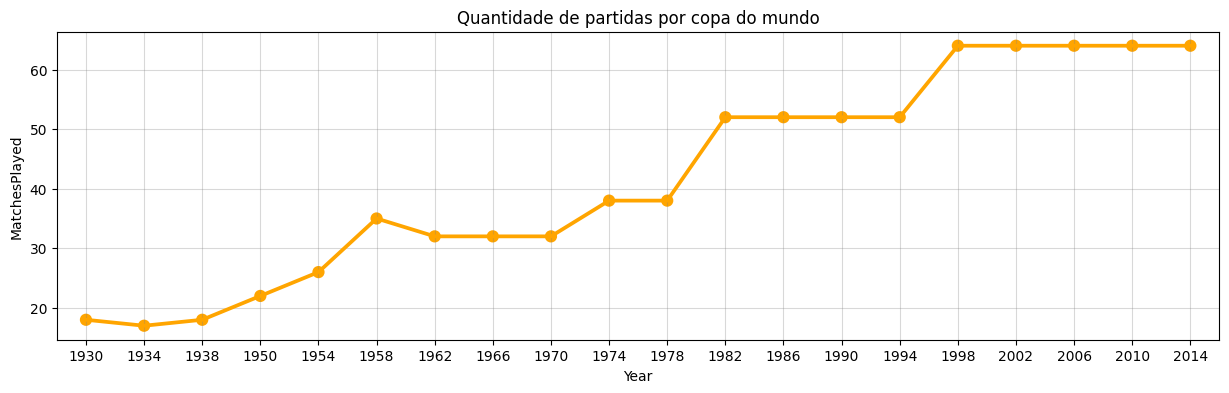

In [18]:
# Quantidade de partidas disputadas por copa do mundo
plt.figure(figsize=(15,4))
sns.pointplot(x='Year', y ='MatchesPlayed', data=world_cup, color="orange")
plt.grid(True,color="grey",alpha=.3)
plt.title("Quantidade de partidas por copa do mundo",color='black')
plt.show()

# Evolução da quantidade de partidas disputadas por copa do mundo. O número aumentou ao longo do tempo e provavelmente está relacionado ao aumento no número de seleções participantes.

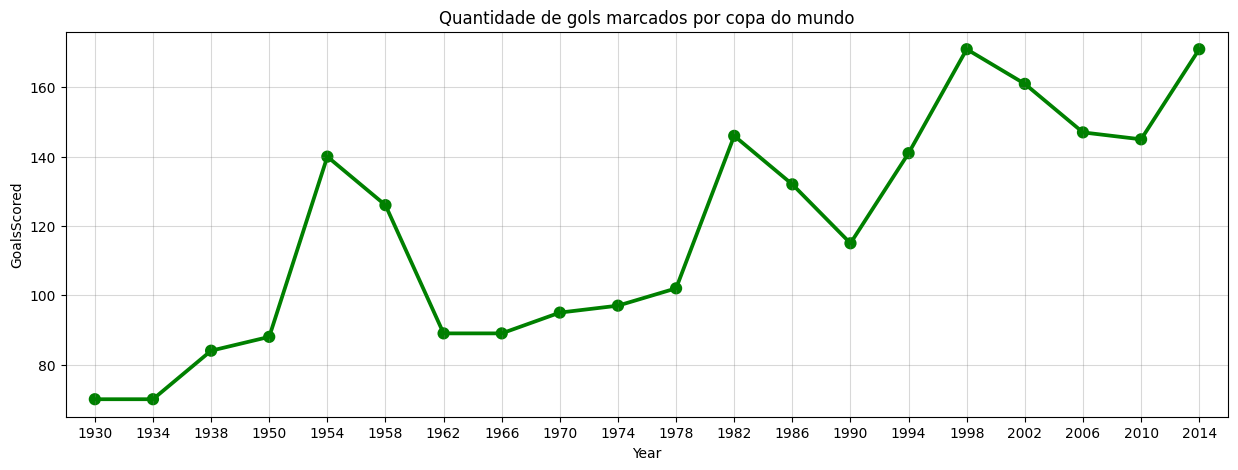

In [19]:
# Quantidade de gols marcados por copa do mundo
plt.figure(figsize=(15,5))
sns.pointplot(x='Year', y ='GoalsScored', data=world_cup, color="green")
plt.grid(True,color="grey",alpha=.3)
plt.title("Quantidade de gols marcados por copa do mundo",color='black')
plt.show()

# Aqui uma visão absoluta sobre a quantidade de gols marcados. Nota-se um aumento ao longo do tempo que pode ser explicado pelo aumento no número de equipes participantes e de partidas disputadas uma vez que a média de gols por jogo caiu conforme visto anteriormente.

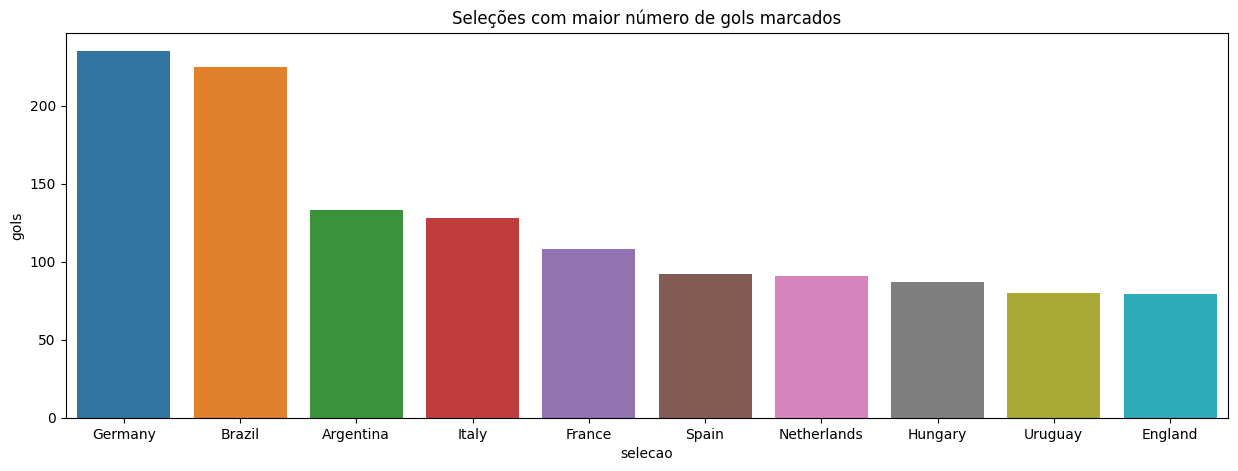

In [20]:
# Total de gols por seleção
gols_casa = matches.groupby("Home Team Name")["Home Team Goals"].sum().reset_index()
gols_casa.columns = ["selecao","gols"]
gols_fora = matches.groupby("Away Team Name")["Away Team Goals"].sum().reset_index()
gols_fora.columns = ["selecao","gols"]
gols = pd.concat([gols_casa, gols_fora],axis=0)
gols = gols.groupby("selecao")["gols"].sum().reset_index()
gols = gols.sort_values(by="gols",ascending =False)
gols["gols"] = gols["gols"].astype(int)

plt.figure(figsize=(15,5))
sns.barplot(x="selecao",y="gols", data=gols[:10])
plt.title("Seleções com maior número de gols marcados",color='black')
plt.show()

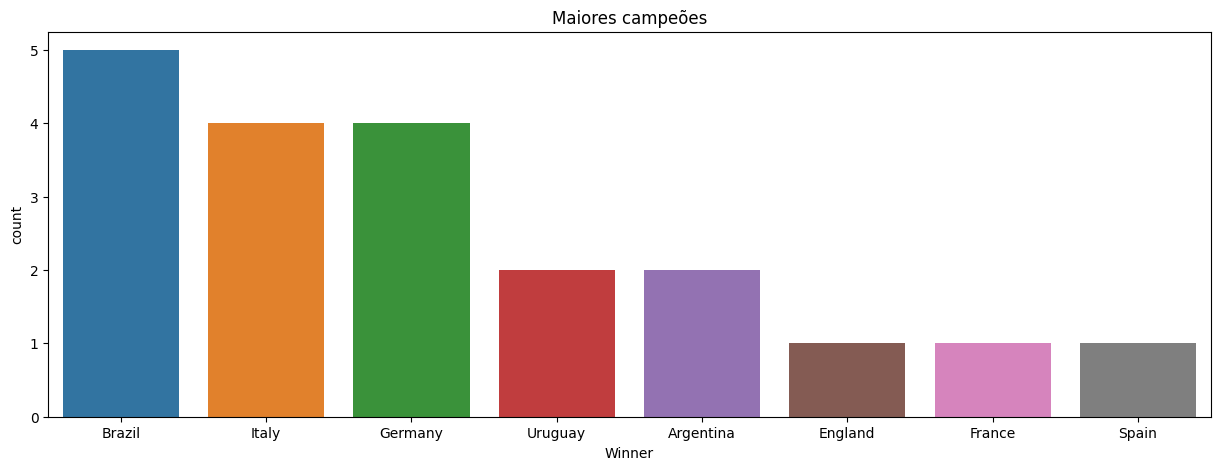

In [21]:
# OS maiores campeões da história da Copa do Mundo
winner = world_cup['Winner'].value_counts()

plt.figure(figsize=(15,5))
sns.countplot(x='Winner', data=world_cup, order=winner.index)
plt.title("Maiores campeões",color='black')
plt.show()

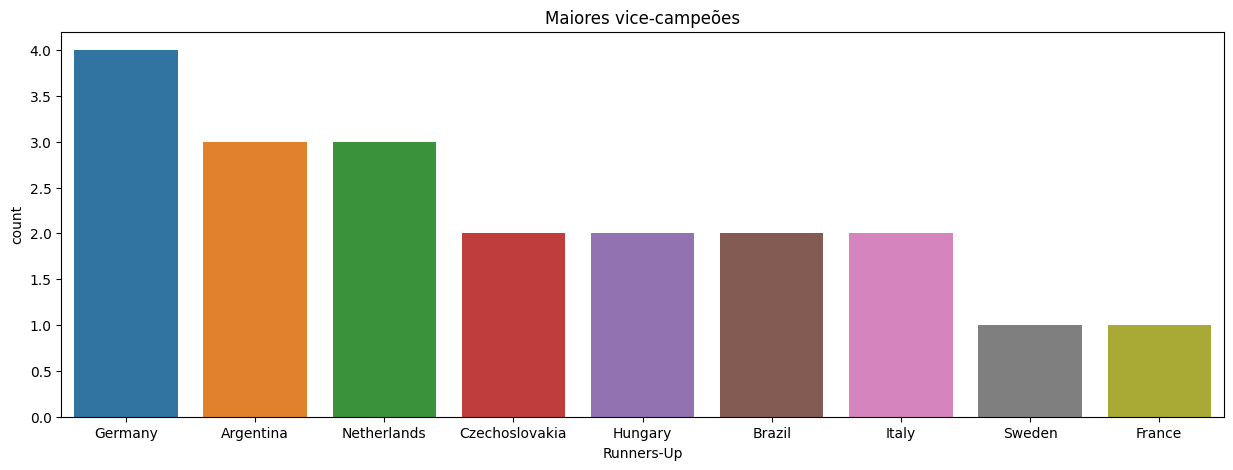

In [22]:
# Os maiores vice-campeões da história da Copa do Mundo
runnerup = world_cup['Runners-Up'].value_counts()

plt.figure(figsize=(15,5))
sns.countplot(x='Runners-Up', data=world_cup, order=runnerup.index)
plt.title("Maiores vice-campeões",color='black')
plt.show()

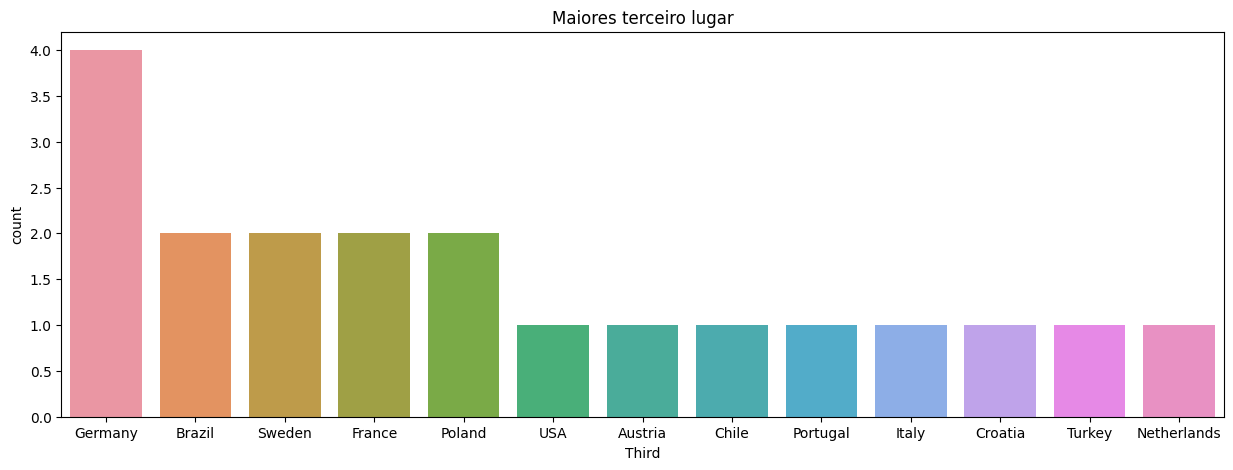

In [23]:
# Mais vezes terceiro lugar na história da Copa do Mundo
third = world_cup['Third'].value_counts()

plt.figure(figsize=(15,5))
sns.countplot(x='Third', data=world_cup, order=third.index)
plt.title("Maiores terceiro lugar",color='black')
plt.show()

In [24]:
# Concatenando as três colunas estruturadas nos gráficos a cima.

teams = pd.concat([winner, runnerup, third], axis=1)
teams.fillna(0, inplace=True)
teams = teams.astype(int)
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


In [25]:
# Import para a biblioteca iplot
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [26]:
teams.iplot(kind = 'bar', xTitle='Equipes', yTitle='Quantidade', title='Maiores vencedores da Copa do Mundo')

# Número de gols por país

In [27]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,TotalGols
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,5.0
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,3.0
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,3.0
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,4.0
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,1.0


In [28]:
#Gols em casa e os gols fora de casa, de cada seleção

home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

In [29]:
home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [30]:
goals = pd.concat(objs = [away, home], axis = 0)

In [31]:
goals = goals.groupby('Countries').sum()
goals

,Goals
Countries,
Algeria,14.0
Angola,1.0
Argentina,133.0
Australia,11.0
Austria,43.0
...,...
United Arab Emirates,2.0
Uruguay,80.0
Wales,4.0


In [32]:
# Organização dos valores de gols de cada país
goals = goals.sort_values(by = 'Goals', ascending=False)
goals

,Goals
Countries,
Germany,235.0
Brazil,225.0
Argentina,133.0
Italy,128.0
France,108.0
...,...
Trinidad and Tobago,0.0
Canada,0.0
China PR,0.0


In [33]:
goals[:20].iplot(kind='bar', xTitle = 'Equipes', yTitle = 'Gols', title = 'Países com os maiores números de gols')

In [34]:
## Gols de cada equipe por copa do mundo

matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,TotalGols
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,5.0
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,3.0
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,3.0
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,4.0
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,1.0


In [35]:
home = matches.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum()
home

Year    Home Team Name
1930.0  Argentina         16.0
        Brazil             4.0
        Chile              4.0
        France             4.0
        Paraguay           1.0
                          ... 
2014.0  Russia             1.0
        Spain              1.0
        Switzerland        4.0
        USA                2.0
        Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [36]:
away = matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
away

Year    Away Team Name
1930.0  Argentina         2.0
        Belgium           0.0
        Bolivia           0.0
        Brazil            1.0
        Chile             1.0
                         ... 
2014.0  Russia            1.0
        Spain             3.0
        Switzerland       3.0
        USA               4.0
        Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [37]:
goals = pd.concat([home, away], axis=1)
goals.fillna(0, inplace=True)
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']
goals = goals.drop(labels = ['Home Team Goals', 'Away Team Goals'], axis = 1)
goals

Goals
Year                   
1930.0 Argentina   18.0
       Brazil       5.0
       Chile        5.0
       France       4.0
       Paraguay     1.0
...                 ...
1998.0 Iran         2.0
       Mexico       8.0
       Norway       5.0
       Tunisia      1.0
2006.0 IR Iran      0.0

[427 rows x 1 columns]

In [38]:
goals = goals.reset_index()

In [39]:
goals.columns = ['Year', 'Country', 'Goals']
goals = goals.sort_values(by = ['Year', 'Goals'], ascending = [True, False])
goals

,Year,Country,Goals
0,1930.0,Argentina,18.0
7,1930.0,Uruguay,15.0
6,1930.0,USA,7.0
8,1930.0,Yugoslavia,7.0
1,1930.0,Brazil,5.0
...,...,...,...
355,2014.0,Japan,2.0
361,2014.0,Russia,2.0
340,2014.0,Cameroon,1.0
352,2014.0,Honduras,1.0


In [40]:
top5 = goals.groupby('Year').head()
top5.head(10)

,Year,Country,Goals
0,1930.0,Argentina,18.0
7,1930.0,Uruguay,15.0
6,1930.0,USA,7.0
8,1930.0,Yugoslavia,7.0
1,1930.0,Brazil,5.0
13,1934.0,Italy,12.0
11,1934.0,Germany,11.0
10,1934.0,Czechoslovakia,9.0
9,1934.0,Austria,7.0
12,1934.0,Hungary,5.0


In [41]:
import plotly.graph_objects as go

In [42]:
x, y = goals['Year'].values, goals['Goals'].values

In [43]:
data = []
for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] == team]['Goals']
    
    data.append(go.Bar(x = year, y = goal, name = team))
layout = go.Layout(barmode = 'stack', title = 'Top 5 Times com mais gols por copa do mundo', showlegend = True)

fig = go.Figure(data = data, layout = layout)
fig.show()

# Análise de todos os primeiros lugares dos tópicos anteriores 

In [44]:
teams.head(1)

,Winner,Runners-Up,Third
Brazil,5,2,2
